Assignment Content

 
This builds on the exploratory analysis you did for assignment #3. You will be submitting a link to your GitHub repository.

Using the same repository you created for assignment #3:
Add the cleaned up version of your data (if you needed to do pre-cleaning) to your data folder
Create a new notebook in the main folder that will be used for your regression analysis

Perform regression analysis on your dataset. You'll do this from two (2) different angles:
Interpretation
Using the full dataset, create an OLS regression model using statsmodels.
Which variables are significant and which are insignificant? What is the overall explanatory power of the model? Are there concerns about the residual distribution? Explain what you are seeing and provide any supporting charts.
Prediction
Using a simple training and test split, split your data into two groups - one for modeling and another for evaluation.
Run an OLS regression and comment on the predictive performance.
Run a Ridge or Lasso regression with a few different levels of regularization strength. Does this help or hurt performance? What happens as you increase the regularization strength? How do the coefficients compare with OLS? Explain what you are seeing and provide any supporting charts.

Rubric:
(10%) Data and notebook are included in the GitHub repository
(10%) Jupyter Notebook
Markdown cells properly formatted. Major steps in the analysis should be described in the markdown and results should be discussed immediately after the code block.
All code blocks have output below - no errors or cells that weren’t executed.
Narratives are properly formatted, with correct grammar and punctuation.
(10%) Output of professional quality
Charts properly labeled (axis labels, titles, …)
(70%) Completeness of regression analysis
(5%) Discussion of business question / objective that is being analyzed (variable you are running the regression on and why)
(15%) Interpretation model - ran the regression model, print output, discussion of results
(50%) Predictive models - ran the OLS model (10%), ran the Ridge or Lasso on multiple alpha (15%), commented on results (5%), compared coefficients (10%), explanation of findings (10%)


In [98]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt 

data1= pd.read_csv('chocolate.csv')
data1

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [99]:
data1 = data1.drop(data1.columns[[0, 1, 4]], axis=1)

In [100]:
data1_nan = data1.dropna()
data1_nan

,company,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
5,A. Morin,France,Venezuela,Chuao,70.0,4.00,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
7,A. Morin,France,Ecuador,Equateur,70.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,nutty,cocoa,fig
26,A. Morin,France,Peru,Absolu,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,dairy,spice,cocoa
29,Acalli,U.S.A,Peru,"Tumbes, Norandino",70.0,3.75,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense,nutty,cherry,cocoa
36,Aelan,Vanuatu,Vanuatu,"EPI Island, batch E 11/19",70.0,3.00,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,woody,spicy,sweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,Zokoko,Australia,Blend,Goddess Blend,65.0,3.25,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,sweet,choco,nutty
2206,Zotter,Austria,India,Kerala State,62.0,3.25,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,oily,subdued,caramel,salt
2208,Zotter,Austria,Dominican republic,"Loma Los Pinos, Yacao region, D.R.",62.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,spice,caramel,toffee,salty
2210,Zotter,Austria,Panama,"Bocas del Toro, Cocabo Co-op",72.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,oily,earthy,caramel,salty


In [101]:
data1.describe()

,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000
mean,71.493930,3.198561,3.075989
std,5.278253,0.434329,0.929875
min,42.000000,1.000000,1.000000
25%,70.000000,3.000000,2.000000
50%,70.000000,3.250000,3.000000
75%,74.000000,3.500000,4.000000
max,100.000000,4.000000,6.000000


In [102]:
data1_sorted = [ 'company','company_location', 'country_of_bean_orgin','review_date','rating'
           'cocoa_percent','counts_of_ingredients','cocoa_butter','vanilla','lecithin','salt','sugar']

In [103]:
len(data1_sorted)

11

In [104]:
data1.shape

(2224, 18)

In [105]:
data1.dtypes

company                              object
company_location                     object
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
rating                              float64
counts_of_ingredients                 int64
beans                                object
cocoa_butter                         object
vanilla                              object
lecithin                             object
salt                                 object
sugar                                object
sweetener_without_sugar              object
first_taste                          object
second_taste                         object
third_taste                          object
fourth_taste                         object
dtype: object

In [106]:
data1.company.unique()

array(['5150', 'A. Morin', 'Acalli', 'Adi aka Fijiana (Easy In Ltd)',
       'Aelan', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)",
       'Alain Ducasse', 'Alexandre', 'Altus aka Cao Artisan', 'Amano',
       'Amatller (Simon Coll)', 'Amazona', 'Ambrosia', 'Amedei', 'AMMA',
       'Anahata', 'Animas', 'Ara', 'Arete', 'Argencove',
       'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Atypic', 'Auro', 'Bahen & Co.', 'Baiani', 'Bakau',
       'Bankston', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Bean',
       'Beau Cacao', 'Beehive', 'Belcolade', 'Bellflower', 'Belvie',
       'Belyzium', 'Benns', 'Benoit Nihant', 'Bernachon',
       'Beschle (Felchlin)', 'Bisou', 'Bitacora', 'Bittersweet Origins',
       'Bixby', 'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Boho', 'Bonaterra', 'Bonnat',
       'Bouga Cacao (Tulicorp)', 'Box Chocolate', 'Brasstown',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mil

In [107]:
data1.cocoa_butter.value_counts()

have_cocoa_butter        1535
have_not_cocoa_butter     689
Name: cocoa_butter, dtype: int64

In [108]:
data1.company_location.value_counts()

U.S.A         948
France        167
Canada        158
U.k.          117
Italy          67
             ... 
Ghana           1
Russia          1
Martinique      1
Wales           1
Suriname        1
Name: company_location, Length: 66, dtype: int64

In [109]:
data1.sugar.value_counts()

have_sugar        2142
have_not_sugar      82
Name: sugar, dtype: int64

In [110]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           2224 non-null   object 
 1   company_location                  2224 non-null   object 
 2   country_of_bean_origin            2224 non-null   object 
 3   specific_bean_origin_or_bar_name  2224 non-null   object 
 4   cocoa_percent                     2224 non-null   float64
 5   rating                            2224 non-null   float64
 6   counts_of_ingredients             2224 non-null   int64  
 7   beans                             2224 non-null   object 
 8   cocoa_butter                      2224 non-null   object 
 9   vanilla                           2224 non-null   object 
 10  lecithin                          2224 non-null   object 
 11  salt                              2224 non-null   object 
 12  sugar 

In [111]:
ingredients = data1[['cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar']]
ingredients 

,cocoa_butter,vanilla,lecithin,salt,sugar
0,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
1,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
2,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
3,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar
4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar
...,...,...,...,...,...
2219,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar
2220,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
2221,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
2222,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar


In [112]:
data1.isna().sum()

company                                0
company_location                       0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [113]:
def change_to_boolean(col_series):
    return col_series.apply(lambda x: False if 'not' in x else True)

In [114]:
data1.sugar.value_counts()

have_sugar        2142
have_not_sugar      82
Name: sugar, dtype: int64

In [115]:
data1.cocoa_butter.value_counts()

have_cocoa_butter        1535
have_not_cocoa_butter     689
Name: cocoa_butter, dtype: int64

In [116]:
data1.company_location.value_counts()

U.S.A         948
France        167
Canada        158
U.k.          117
Italy          67
             ... 
Ghana           1
Russia          1
Martinique      1
Wales           1
Suriname        1
Name: company_location, Length: 66, dtype: int64

In [117]:
data1.vanilla.value_counts()

have_not_vanila    1876
have_vanila         348
Name: vanilla, dtype: int64

In [118]:
data1.salt.value_counts()

have_not_salt    2187
have_salt          37
Name: salt, dtype: int64

In [119]:
top_countries = data1.country_of_bean_origin.value_counts()
top_countries

Venezuela                238
Peru                     207
Dominican republic       200
Ecuador                  194
Madagascar               157
                        ... 
Burma                      1
Tobago                     1
Suriname                   1
St.vincent-grenadines      1
Sao tome & principe        1
Name: country_of_bean_origin, Length: 62, dtype: int64

In [120]:
rating_and_composition = data1[['rating',
    'cocoa_percent',
    'counts_of_ingredients',
    'cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar']]
rating_and_composition

,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar
0,3.75,76.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
1,3.50,76.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
2,3.25,76.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
3,3.75,63.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar
4,3.50,70.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar
...,...,...,...,...,...,...,...,...
2219,2.75,80.0,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar
2220,3.75,75.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
2221,3.50,72.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar
2222,3.25,70.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar


In [121]:
top_rated = data1[data1.rating == data1.rating.max()]
top_rated

,company,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
5,A. Morin,France,Venezuela,Chuao,70.0,4.0,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
6,A. Morin,France,Peru,Chanchamayo Province,63.0,4.0,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
16,A. Morin,France,Peru,Pablino,70.0,4.0,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,delicate,hazelnut,brownie,NaN
72,Amano,U.S.A,Ecuador,Guayas,70.0,4.0,4,have_bean,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong spice,intense pepper,NaN,NaN
75,Amano,U.S.A,Papua new guinea,Morobe,70.0,4.0,4,have_bean,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,tart,lemon,smoke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,Valrhona,France,Venezuela,"Porcelana, Pedegral",64.0,4.0,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,honey,peanut butter,NaN
2116,Valrhona,France,Venezuela,"Otucan, Grand Cru",69.0,4.0,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,green,unripened fruit,banana,NaN
2119,Valrhona,France,Peru,"Piura, Illanka, Quemazon",63.0,4.0,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense,dark berry,grapes,NaN
2162,Willie's Cacao,U.k.,Colombia,Los Llanos,70.0,4.0,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,spicy,cinamon,NaN


In [153]:
data1.set_index('company', inplace = True)
data1.head()

,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
company,,,,,,,,,,,,,,,,,
5150,U.S.A,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
5150,U.S.A,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
5150,U.S.A,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
A. Morin,France,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
A. Morin,France,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


(array([ 0.,  0., 14., 86.,  1.]),
 array([30, 50, 60, 70, 85, 99]),
 <BarContainer object of 5 artists>)

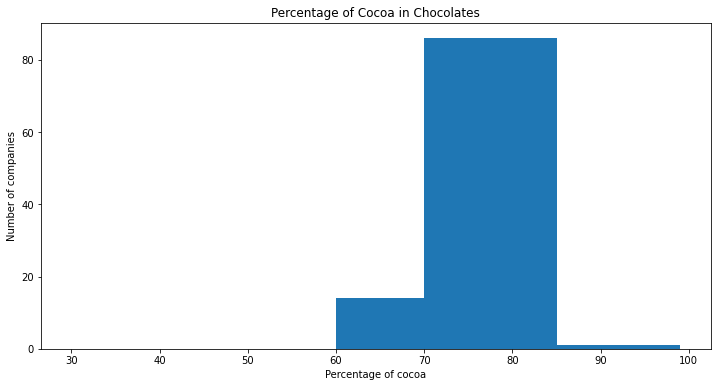

In [122]:
plt.figure(figsize=(12,6)) 
plt.title("Percentage of Cocoa in Chocolates")
plt.xlabel('Percentage of cocoa')
plt.ylabel('Number of companies')
plt.hist(top_rated.cocoa_percent, bins=[30, 50, 60, 70, 85, 99])

In [123]:
data1.sample(10)

,company,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
47,Alain Ducasse,France,Peru,"Piura, Perou",75.0,2.50,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cardboard,dirt,roasty,NaN
497,Chocovic,Spain,Blend,Maragda,70.0,3.00,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,marshmallow,NaN,NaN
48,Alain Ducasse,France,Madagascar,Madagascar,75.0,3.00,5,have_bean,have_cocoa_butter,have_vanila,have_not_lecithin,have_salt,have_sugar,have_not_sweetener_without_sugar,citrus,fatty,dairy,NaN
1464,Naive,Lithuania,Blend,Trinidad & Tobago,70.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,floral,spice,roasty
743,ENNA,U.S.A,Honduras,"Wampusirpi, batch 007",75.0,3.25,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,carrots,heavy roast,NaN,NaN
606,Dark Forest,U.S.A,Venezuela,Ocumare,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,nutty,sweet,NaN
493,Chocolats Privilege,Canada,Mexico,Xoconusco,70.0,2.50,4,have_bean,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,vanilla,mass market,NaN
663,Domori,Italy,Peru,Apurimac,70.0,3.25,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,floral,olive,NaN,NaN
1195,Laia aka Chat-Noir,France,Madagascar,"Madagascar, Batch 59/100",75.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,sour,cardboard,NaN
1033,Holy Cacao,Israel,Dominican republic,Hispaniola,70.0,2.75,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,red berry,sour,NaN


## rating and counts

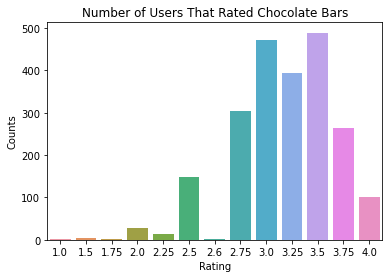

In [124]:
sns.countplot(x= "rating", data= data1)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Number of Users That Rated Chocolate Bars")
plt.show()

## cocoa percentage in chocolate bar 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


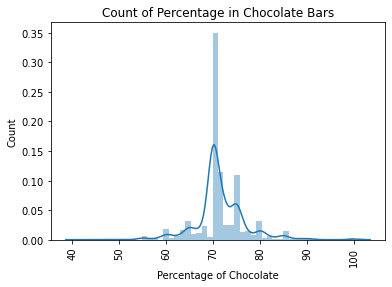

In [125]:
sns.distplot(data1["cocoa_percent"])
plt.title("Count of Percentage in Chocolate Bars")
plt.xlabel("Percentage of Chocolate")
plt.ylabel("Count")
plt.xticks(rotation= 90)
plt.show()

## cocoa perecentage and rating 

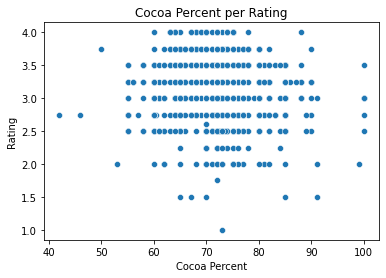

In [126]:
sns.scatterplot(x= "cocoa_percent", y= "rating", data=data1)
plt.title("Cocoa Percent per Rating")
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.show()

In [127]:
### traning and test data

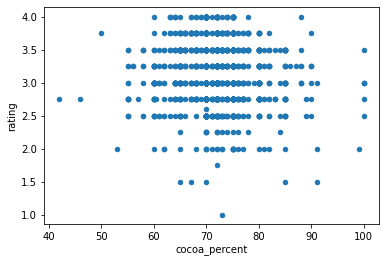

In [128]:
data1.plot(kind='scatter', x='cocoa_percent', y='rating')
plt.show()

In [141]:
rate = data1['rating']
cocoa= data1['cocoa_percent']

In [142]:
x = np.array(rate).reshape(-1,1)
y = np.array(cocoa)

In [143]:
#X_train, X_test, y_train, y_test = train_test_split(data1.cocoa_percent, data1.rating)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =8)

In [144]:
model = LinearRegression()
model.fit(X_train, y_train)


#LR = LinearRegression()


#LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

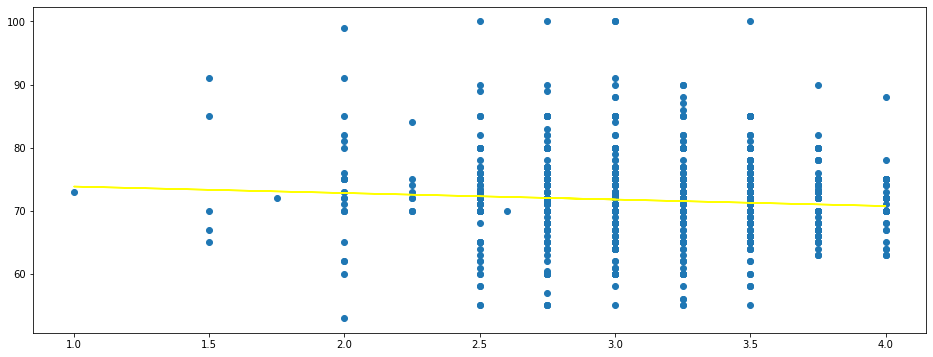

In [145]:
fig, ax = plt.subplots(figsize =(16,6))
ax.scatter(X_train, y_train)
ax.plot(X_train, model.predict(X_train), color='yellow')
plt.show()

In [146]:
model.intercept_

74.86279914758389

In [147]:
#y = mx +b m is the slope of the line 
m = model.coef_
m

array([-1.02882576])

In [148]:
model.score(X_train, y_train)

0.007183764184323316

In [149]:
predictions = model.predict(X_test)
#predictions
X_test

array([[3.25],
       [3.25],
       [3.  ],
       [2.25],
       [3.25],
       [3.25],
       [3.75],
       [3.5 ],
       [3.5 ],
       [3.75],
       [3.75],
       [3.  ],
       [3.  ],
       [2.25],
       [3.75],
       [3.75],
       [3.25],
       [3.5 ],
       [3.5 ],
       [3.75],
       [2.5 ],
       [3.75],
       [3.5 ],
       [3.5 ],
       [3.5 ],
       [3.  ],
       [3.25],
       [4.  ],
       [3.75],
       [4.  ],
       [3.  ],
       [3.5 ],
       [2.75],
       [3.  ],
       [2.5 ],
       [3.5 ],
       [2.75],
       [4.  ],
       [3.25],
       [4.  ],
       [2.75],
       [4.  ],
       [3.25],
       [3.75],
       [2.5 ],
       [3.  ],
       [3.5 ],
       [2.75],
       [3.75],
       [3.  ],
       [2.75],
       [3.75],
       [3.75],
       [2.75],
       [3.  ],
       [3.5 ],
       [3.5 ],
       [2.75],
       [3.25],
       [3.75],
       [3.25],
       [3.  ],
       [2.75],
       [2.75],
       [2.75],
       [3.25],
       [3.

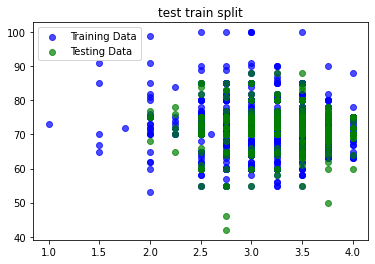

In [150]:
plt.scatter(X_train, y_train, label = 'Training Data', color ='b', alpha=.7)
plt.scatter(X_test, y_test, label = 'Testing Data', color ='g', alpha=.7)
plt.legend()
plt.title('test train split')
plt.show()

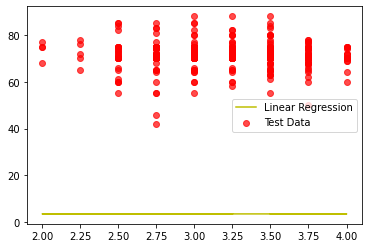

In [151]:
prediction = LR.predict(X_test)
plt.plot (X_test, prediction, label='Linear Regression', color='y')
plt.scatter(X_test, y_test, label= "Test Data", color='r', alpha=.7)
plt.legend()
plt.show()

In [152]:
LR.predict(np.array([[3.0]]))[0]

3.5612053263505885